In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv(r'cleaned_dataset.csv')

# Set seaborn style
sns.set_style("whitegrid")

pollutants = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'Overall AQI']

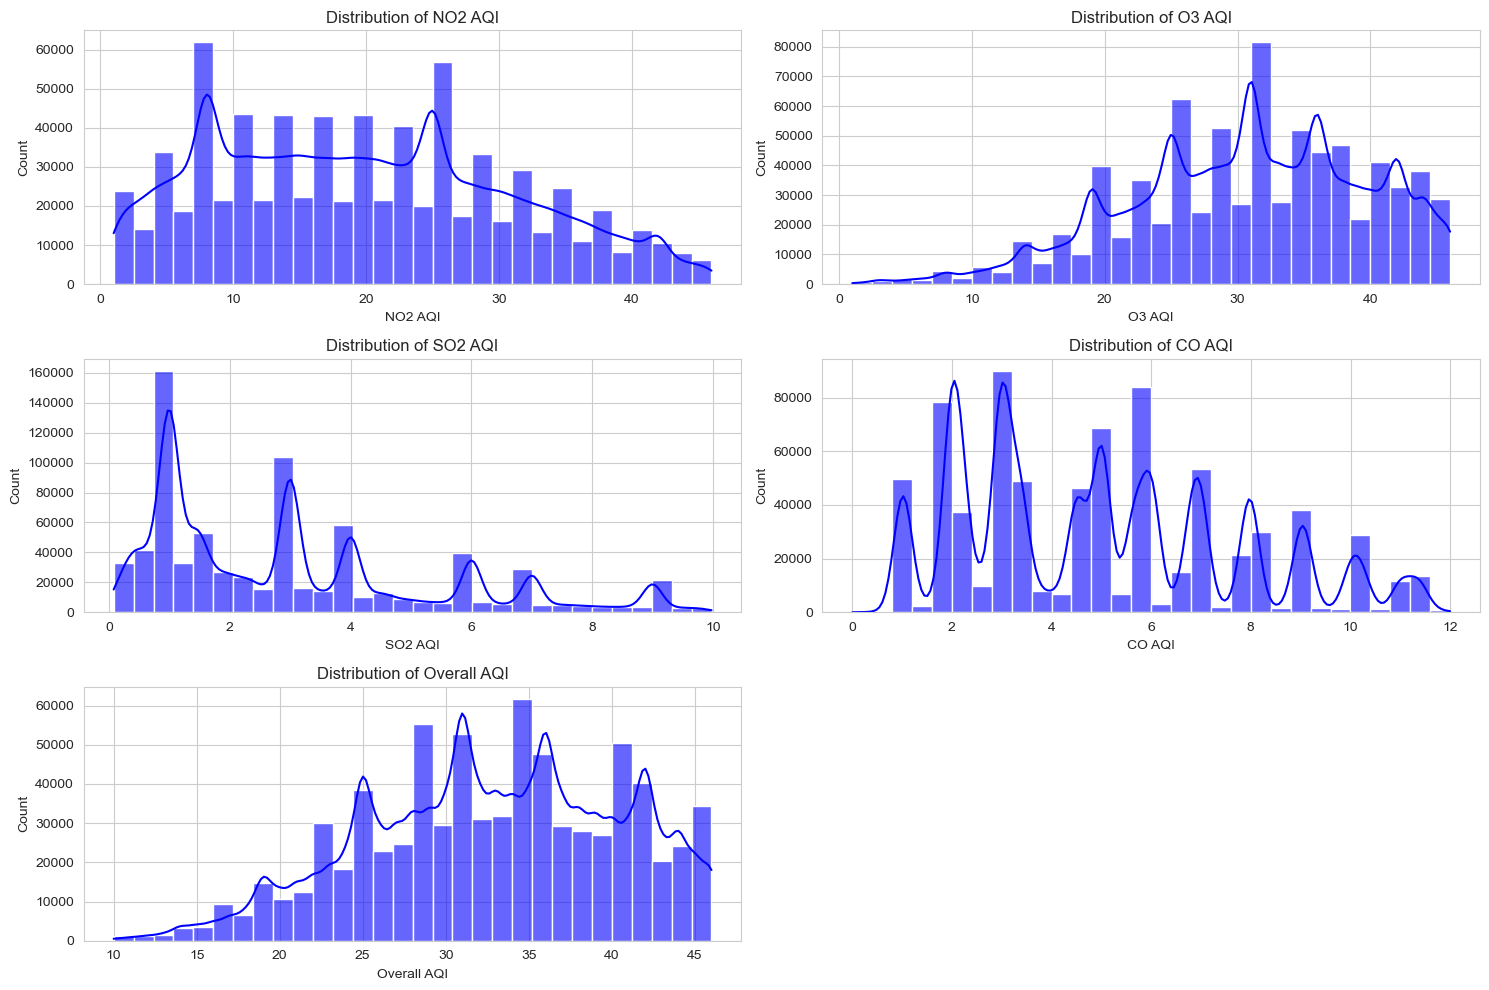

In [67]:
# Histograms & Density Plots
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[pollutant], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f"Distribution of {pollutant}")

plt.tight_layout()
plt.show()

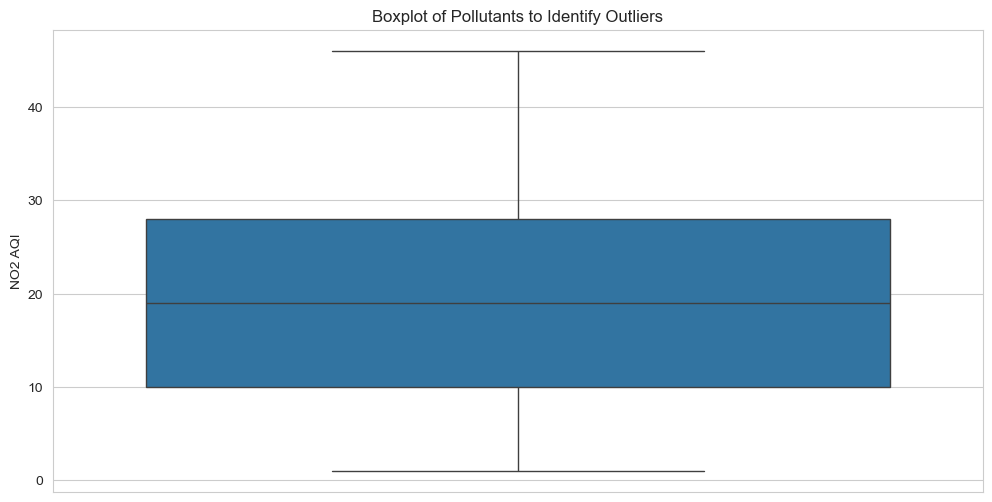

In [61]:
# NO2 Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['NO2 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

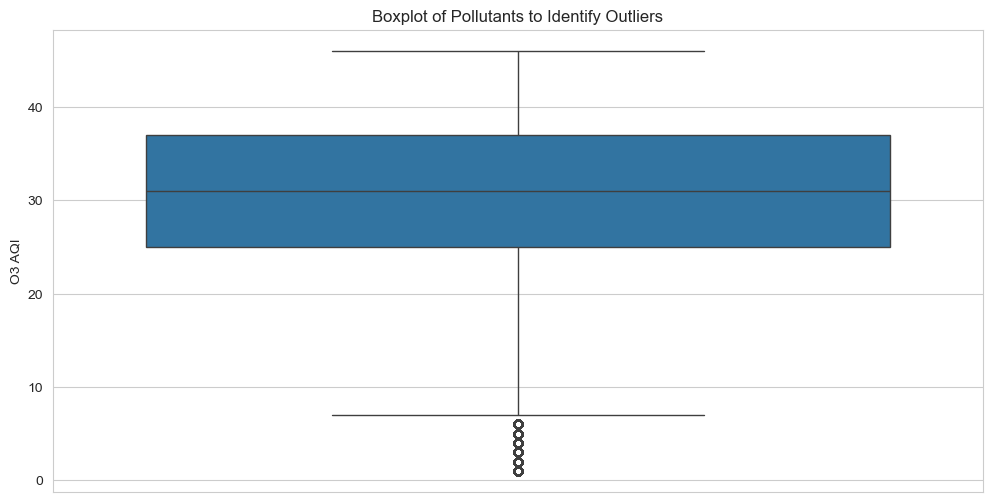

In [62]:
# O3 Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['O3 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

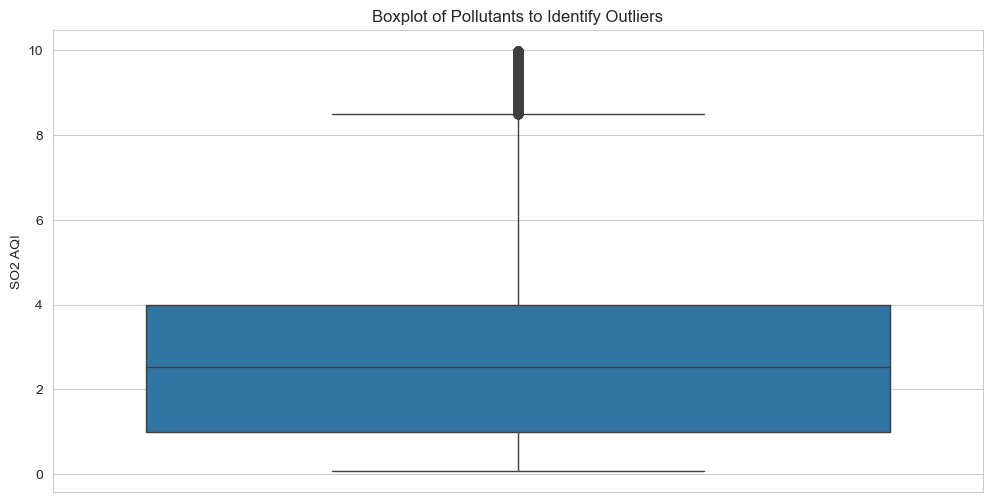

In [63]:
# SO2 Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['SO2 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

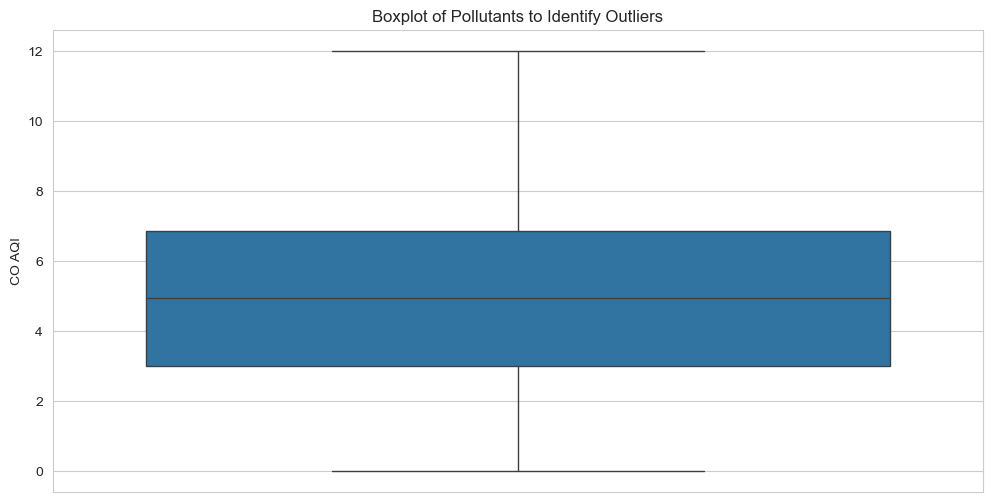

In [64]:
# CO Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['CO AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

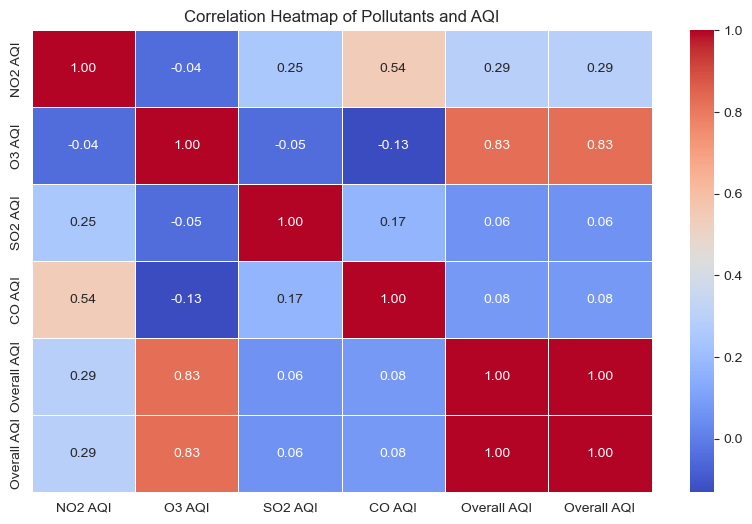

In [65]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = data[pollutants + ["Overall AQI"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()